## Observations and Insights

Three observations that we can see in this analisis are the following

* hahaha

* oakakao

* iajkajkaj

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Grouping by drug regimen
data_drug = merged_data.groupby("Drug Regimen")
# Computing the columns for mean, median and variance for the tumor volume 
summary = data_drug["Tumor Volume (mm3)"].agg(["mean", "median", "var"])
# Computing the columns for standard deviation and the SEM value
sem_value = []
for drug, drug_df in data_drug:
    sem_value.append(st.sem(drug_df["Tumor Volume (mm3)"]))

summary["stdev"] = summary["var"]**(0.5)
summary["SEM"] = sem_value

print("The summary statistics of the tumor volume by regime is")
summary

The summary statistics of the tumor volume by regime is


,mean,median,var,stdev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

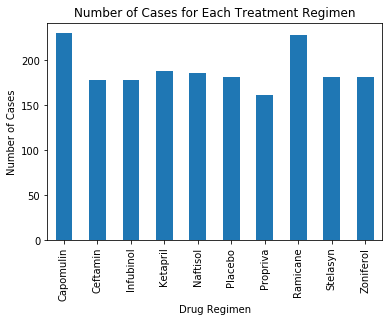

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

data_drug["Tumor Volume (mm3)"].count().plot(kind = "bar")
plt.title("Number of Cases for Each Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Cases")
plt.show()

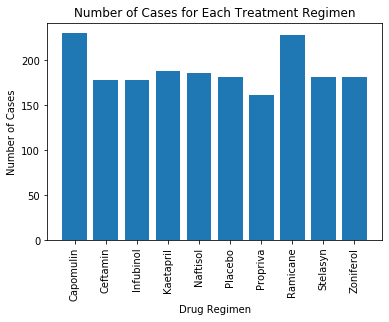

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drugs = ["Capomulin", "Ceftamin", "Infubinol","Kaetapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
drug_number = data_drug["Tumor Volume (mm3)"].count()

plt.bar(drugs, drug_number)
plt.title("Number of Cases for Each Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Cases")
plt.xticks(rotation = 90)
plt.show()

## Pie plots

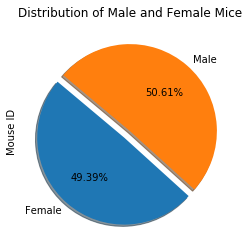

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex = merged_data.groupby("Sex")

mouse_sex.count()["Mouse ID"].plot(kind = "pie", autopct = "%1.2f%%",startangle = 140, explode = (0.1, 0), shadow = True)
plt.title("Distribution of Male and Female Mice")
plt.show()

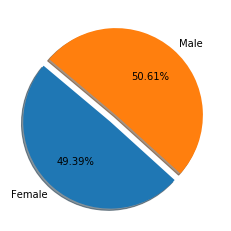

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import numpy as np

female_mouse = mouse_sex.count()["Mouse ID"]["Female"]
male_mouse = mouse_sex.count()["Mouse ID"]["Male"]

gender = ["Female", "Male"]
quantity = [float(female_mouse), float(male_mouse)]
x_axis = np.arange(0, len(gender))
explode = (0.1, 0)
plt.axis(option = "equal")

plt.pie(quantity, autopct = "%1.2f%%",labels = gender, explode = explode, shadow = True, startangle = 140)
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 



In [35]:

quartiles = data_drug.quantile([.25,.5,.75])["Tumor Volume (mm3)"]

lowerq = []
upperq = []
iqr = []
for drug, quartile_df in quartiles
    
    lowerq.append(temporal[0.25])
    upperq.appen(temporal[0.75])
    iqr = upperq-lowerq
    

"""print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")"""

TypeError: list indices must be integers or slices, not float

In [50]:
data_drug["Tumor Volume (mm3)"]

In [51]:
###data_drug.quantile([.25,.5,.75])["Tumor Volume (mm3)"]

Drug Regimen      
Capomulin     0.25    37.685933
              0.50    41.557809
              0.75    45.000000
Ceftamin      0.25    47.208427
              0.50    51.776157
              0.75    56.801438
Infubinol     0.25    47.312353
              0.50    51.820584
              0.75    57.314444
Ketapril      0.25    48.232987
              0.50    53.698743
              0.75    60.870951
Naftisol      0.25    47.285874
              0.50    52.509285
              0.75    59.963034
Placebo       0.25    47.459053
              0.50    52.288934
              0.75    59.916934
Propriva      0.25    47.081086
              0.50    50.854632
              0.75    56.184664
Ramicane      0.25    36.674635
              0.50    40.673236
              0.75    45.000000
Stelasyn      0.25    48.047139
              0.50    52.431737
              0.75    58.719297
Zoniferol     0.25    47.337876
              0.50    51.818479
              0.75    57.954259
Name: Tumor Volume (m

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

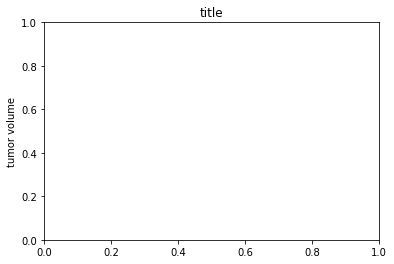

In [226]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


tem = data_drug["Tumor Volume (mm3)"]
tem


fig1, ax1 = plt.subplots()
ax1.set_title('title')
ax1.set_ylabel('tumor volume')
ax1.boxplot(tem)
plt.show()

## Line and scatter plots

In [270]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [1]:
name = merged_data.groupby(["Mouse ID"], as_index = False)

len(list(name))

"""for i in len(list(name)):
    list(name)[i][1]["Drug Regimen"].loc[(list(name)[i][1]["Drug Regimen"] == "Capomulin")]
    print(i)
    break"""

NameError: name 'merged_data' is not defined

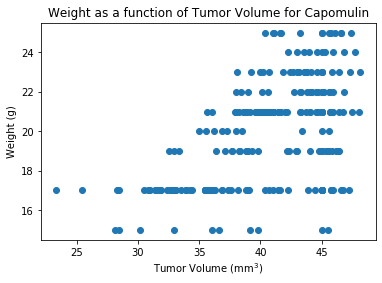

In [190]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
vol = data_drug.get_group("Capomulin")["Tumor Volume (mm3)"]
weight = data_drug.get_group("Capomulin")["Weight (g)"]

plt.scatter(vol, weight)
plt.title("Weight as a function of Tumor Volume for Capomulin")
plt.xlabel(r"Tumor Volume (mm$^3$)")
plt.ylabel("Weight (g)")
plt.show()

The r-squared is: 0.5256995552077166


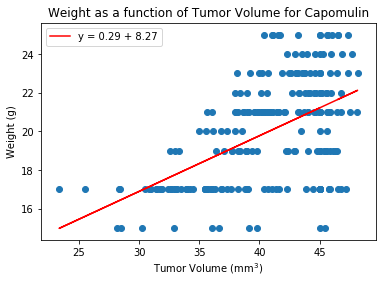

In [219]:
# Calculate the correlation coefficient and linear regression model for mouse weight 
# and average tumor volume for the Capomulin regimen
vol = data_drug.get_group("Capomulin")["Tumor Volume (mm3)"]
weight = data_drug.get_group("Capomulin")["Weight (g)"]


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(vol, weight)
regress_values = vol * slope + intercept
plt.plot(vol, regress_values, "r-", label = f"y = {slope:.2f} + {intercept:.2f}")

plt.scatter(vol, weight)
plt.title("Weight as a function of Tumor Volume for Capomulin")
plt.xlabel(r"Tumor Volume (mm$^3$)")
plt.ylabel("Weight (g)")

print(f"The r-squared is: {rvalue}")
plt.legend(loc = "best")
plt.show()